In [3]:
%load_ext autoreload
%autoreload 2

In [8]:
# Setup output and imports
from tslib import ts_import, ts_output, ts_log, ts_csvout
PROG = "unit-test"                # This experiment's ID
OUT_D = ts_output(PROG)           # Output file directory

# import relevant libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

libem = ts_import("libem", "20211006")
cmp = ts_import("components", "20211006")
rlm = ts_import("realmodel", "20211004")
libvis = ts_import("libvis", "20211027")

Results directory already exists: results\unit-test20211110


## Set up dimensions and conversions

In [24]:
""" #SI
conv = rlm.Conversion(
    mass=1, # kg / sim unit
    length=1, # 1m / sim unit
    time=1, # 1s / sim unit
    charge=1, # 1C / sim unit
    voltage=1 # 1V / sim unit
) """

#SI
conv = rlm.Conversion(
    mass=9.1e-31, # electron mass / sim unit
    length=1, # 1m / sim unit
    time=1, # 1s / sim unit
    charge=1.62e-19, # electron charge / sim unit
    voltage=1 # 1V / sim unit
)


DIM = {
    "length": conv.real_to_sim(0.02, "length"),
    "box": conv.real_to_sim(0.01, "length"),
    "thickness": conv.real_to_sim(0.001, "length")
}
ts_log(PROG, "Dimensions in sim units: " + str(DIM))

Dimensions in sim units: {'length': 0.02, 'box': 0.01, 'thickness': 0.001}


Sim scale: 2000


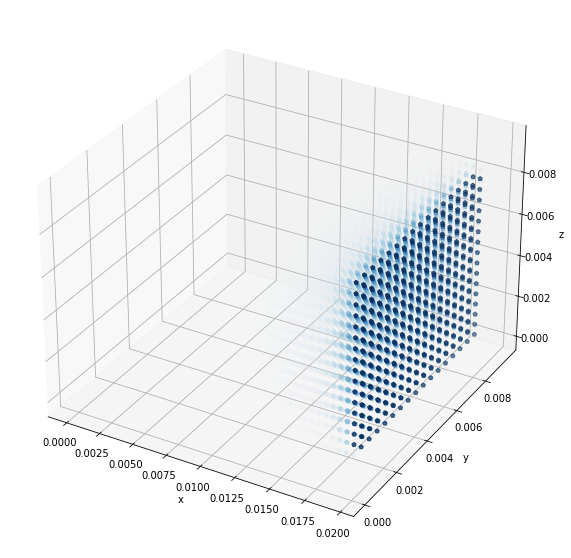

In [25]:
sim = libem.EMSimulationSpace3D(
    space_size=(DIM["length"], DIM["box"], DIM["box"]),
    top_left=(0, 0, 0),
    scale=int(20.0 / conv.real_to_sim(0.01, "length"))
)
ts_log(PROG, "Sim scale: " + str(sim.scale))

sim.compute([    
    cmp.enf(+1, cmp.EMObjects.rectangular_prism_solid,
            (DIM["length"] - DIM["thickness"], DIM["thickness"], DIM["thickness"]),
            (DIM["thickness"], DIM["box"] - (2 * DIM["thickness"]), DIM["box"] - (2 * DIM["thickness"])),
            conv.real_to_sim(1, "voltage")
    )
])
sim.get_efield()

libvis.Visualizations.colormesh_3d(sim)

In [28]:
particle = libem.ChargedParticle3D(
    sim,
    conv.real_to_sim(1, "mass"),
    conv.real_to_sim(1, "charge"),
    (0, DIM["box"] / 2.0, DIM["box"] / 2.0),
    (conv.real_to_sim(5.92e5, "length / time"), 0, 0)
)

particle.compute_motion((0, conv.real_to_sim(0.1, "time")))

plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")
libvis.Visualizations.colormesh_3d(sim, graph_ax=ax)
libvis.Visualizations.trajectory_3d(particle.time, particle.position, graph_ax=ax)
plt.show()

ts_log(PROG, "Final Position", particle.position[:,-1])
ts_log(PROG, "Final Velocity", particle.velocity[:,-1])

Exception occured during time step (0, 0.1) : only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices


ValueError: need at least one array to concatenate